<font size="+3">
    <b>Blockchain Project</b>
</font>
<br>

# Imports

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/DSO_464_Spring_2024/11_Midterm_(Take_Home)/Data/'

# Blockchain Data: On-Chain and Off-Chain Time-Series Data
<br>
<font size="+1">
  <ul>
    <li><b>BACKGROUND:</b></li>
    <br>
    <ul>
      <li><b>Blockchain:</b> A blockchain is a distributed and decentralized digital database that records transactions across a network of computers. Each transaction is grouped into a block, and these blocks are linked together in a chronological chain, forming the "blockchain." Once a block is added to the chain, it is immutable and cannot be altered retroactively without altering all subsequent blocks, making the blockchain secure and tamper-resistant.</li>
      <br>
      <li><b>Data Generation:</b> Data on a blockchain is generated through transactions. When a user initiates a transaction, such as sending cryptocurrency or recording information, the details of the transaction are verified by network participants (nodes) and then added to a new block. This block is then appended to the existing blockchain, creating a permanent and transparent record of the transaction. In Ethereum, a new block is created approximately every 13-15 seconds on average. This time frame can vary slightly depending on network conditions and other factors.</li>
      <br>
      <li><b>On-chain Data:</b> On-chain data refers to information that is recorded and stored directly on the blockchain. This includes transaction details, smart contract code, token balances, and other data related to blockchain activities. On-chain data is publicly accessible and transparent, allowing anyone to view the information stored on the blockchain.</li>
      <br>
      <li><b>Off-chain Data:</b> Off-chain data, on the other hand, refers to information that is stored or processed outside of the blockchain network. This can include data stored on centralized servers, cloud storage, or any other external databases. Off-chain data is not directly recorded on the blockchain but may be referenced or linked to on-chain transactions through cryptographic proofs or external references.</li>
      <br>
      <li> In Ethereum transactions, <b>gas used</b> is like the fuel consumed when you drive a car. It shows how much computing power was needed to process a transaction on the Ethereum network. The more complex the transaction, the more gas used. It's important because it determines the transaction fee; the higher the gas used, the higher the fee. So, it's like knowing how much gas your car used to understand the cost of traveling.</li>
      <br>
      <li>More precisely, <b>gas used</b> refers to the actual amount of computational resources (gas) consumed during the execution of a transaction on the Ethereum blockchain. It represents the total cost incurred for processing the transaction, which includes executing the smart contract code (if applicable), updating the blockchain state, and validating the transaction.</li>
      <br>
      <li>The gas used is crucial for determining the transaction fee (gas fee) paid by the sender, as it directly influences the cost of executing the transaction. Transactions with higher computational complexity or interactions with smart contracts typically require more gas and thus incur higher fees.</li>
      <br>
      <li>Overall, the gas used metric provides insights into the computational intensity of transactions and helps users understand the resource requirements and associated costs of interacting with the Ethereum network.</li>
      <br>
    </ul>
    <li>We will read in some data related to blockchains that are from an actual blockchain database (on-chain) and also data that is from the off-chain databases.</li>
    <br>
    <ul>
      <li><b>Binance_ETHUSDT_minute.csv</b> is an <b>off-chain data set</b> from an exhchange (Binance). It consists of minute-by-minute prices (i.e. exchange rates) for the cryptocurrency pair: Ethereum (ETH) and Tether (USDT). The data consists of the following fields:</li>
      <br>
      <ul>
        <li><b>Symbol</b>: represents the trading pair or asset being traded.</li>
        <br>
        <li><b>Open, High, Low, Close</b>: represents the opening, highest, lowest, and closing price reached by the asset during the trading period.</li>
        <br>
        <li><b>Volume ETH, Volume USDT</b>: represents volume of the asset traded in terms of Ethereum (ETH) or Tether (USDT), representing the total amount of the asset exchanged during the trading period, measured in units of Ethereum or Tether (which is a stablecoin pegged to the US dollar).</li>
        <br>
        <li><b>Tradecount</b>: represents the number of trades executed for the asset during the trading period, indicating the level of trading activity.</li>
        <br>
      </ul>
      <li><b>blocks.csv</b> is an <b>on-chain data set</b> from the Ethereum blockchain containing aggregate block-level data. It contains minute-by-minute data that counts the number of transactions that occur (in a block) in that particular minute.</li>
      <br>
      <li><b>transactions.csv</b> is an <b>on-chain data set</b> from the Ethereum blockchain containing disaggregated transaction-level data. It contains minute-by-minute data that represents the average price of gas (per block) in that particular minute.</li>
      <br>
      <li><b>traces.csv</b> is an <b>on-chain data set</b> from the Ethereum blockchain. It contains minute-by-minute data representing the total gas used per minute. <b>This is an important quantity to predict.</b></li>
      <br>
      <ul>
        <li>Being able to accurately predict the gas used is useful for the following reasons:</li>
        <br>
        <ul>
          <li><b>Cost Estimation</b>: Gas usage directly influences the cost of executing a transaction on the Ethereum network. Predicting gas usage helps users estimate the cost of their transactions in terms of Ether.</li>
          <br>
          <li><b>Optimizing Performance</b>: By predicting gas usage, developers can optimize their smart contracts and transactions to minimize gas consumption. This optimization can lead to more efficient and cost-effective operations on the Ethereum blockchain.</li>
          <br>
          <li><b>Preventing Out-of-Gas Errors</b>: Transactions that run out of gas before completing are reverted, wasting resources and potentially causing disruptions. Predicting gas usage helps developers avoid these errors by ensuring that sufficient gas is provided for the transaction to complete successfully.</li>
          <br>
          <li><b>Resource Management</b>: For decentralized applications (DApps), predicting gas usage is crucial for managing resources efficiently. DApp developers can allocate resources based on predicted gas consumption to ensure smooth operation and prevent network congestion.</li>
          <br>
        </ul>
    </ul>

In [ ]:
# os.listdir(data_path)

In [ ]:
eth_usdt_binance_prices = pd.read_csv(os.path.join(data_path, 'Binance_ETHUSDT_minute.csv'), parse_dates=[1])

eth_usdt_binance_prices.set_index('date', inplace=True)
eth_usdt_binance_prices.sort_index(inplace=True)

eth_usdt_binance_prices.drop(columns=['unix'], inplace=True)

eth_usdt_binance_prices.head()

,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
date,,,,,,,,
2019-11-27 07:45:00,ETH/USDT,146.0,146.0,146.0,146.0,0.01,1.46,1
2019-11-27 07:46:00,ETH/USDT,146.0,146.0,146.0,146.0,0.00,0.00,0
2019-11-27 07:47:00,ETH/USDT,146.0,146.0,146.0,146.0,0.00,0.00,0
2019-11-27 07:48:00,ETH/USDT,146.0,146.0,146.0,146.0,0.00,0.00,0
2019-11-27 07:49:00,ETH/USDT,146.0,146.0,146.0,146.0,0.00,0.00,0


In [ ]:
# Data has been processed and downsampled so that timestamps are evenly spaced and can be easily merged with the off-chain data
# Also, note the data has been downsampled so that the time steps are regularly spaced

blocks = pd.read_csv(os.path.join(data_path, 'blocks.csv'), parse_dates=[0])

blocks.set_index('Date', inplace=True)
blocks.sort_index(inplace=True)

blocks.rename(columns={'Count':'Total_Block_Txns_Count_Per_Minute'}, inplace=True)

blocks.head()

,Total_Block_Txns_Count_Per_Minute
Date,
2021-01-01 00:00:00,908
2021-01-01 00:01:00,848
2021-01-01 00:02:00,435
2021-01-01 00:03:00,637
2021-01-01 00:04:00,567


In [ ]:
# Data has been processed and downsampled so that timestamps are evenly spaced and can be easily merged with the off-chain data
# Also, note the data has been downsampled so that the time steps are regularly spaced

transactions = pd.read_csv(os.path.join(data_path, 'transactions.csv'), parse_dates=[0])

transactions.set_index('Date', inplace=True)
transactions.sort_index(inplace=True)

transactions.rename(columns={'Price':'Avg_Gas_Price_Per_Block'}, inplace=True)

transactions.head()

,Avg_Gas_Price_Per_Block
Date,
2021-10-17 00:00:00,8.761196e+10
2021-10-17 00:01:00,8.293807e+10
2021-10-17 00:02:00,7.481023e+10
2021-10-17 00:03:00,8.082413e+10
2021-10-17 00:04:00,8.502241e+10


In [ ]:
# Data has been processed and downsampled so that timestamps are evenly spaced and can be easily merged with the off-chain data
# Also, note the data has been downsampled so that the time steps are regularly spaced

gas_used = pd.read_csv(os.path.join(data_path, 'traces.csv'), parse_dates=[0])

gas_used.set_index('Date', inplace=True)
gas_used.sort_index(inplace=True)

gas_used.rename(columns={'Count':'Total_Gas_Used_Per_Minute'}, inplace=True)

gas_used.head()

,Total_Gas_Used_Per_Minute
Date,
2021-01-01 00:00:00,131551972.0
2021-01-01 00:01:00,98746727.0
2021-01-01 00:02:00,88524927.0
2021-01-01 00:03:00,99669060.0
2021-01-01 00:04:00,66270427.0


In [ ]:
# # Sanity Check
# print((transactions.index.to_frame() - transactions.index.to_frame().shift()).describe())
# print((blocks.index.to_frame() - blocks.index.to_frame().shift()).describe())
# print((gas_used.index.to_frame() - gas_used.index.to_frame().shift()).describe())
# print((eth_usdt_binance_prices.index.to_frame() - eth_usdt_binance_prices.index.to_frame().shift()).describe())

In [ ]:
df = eth_usdt_binance_prices.merge(blocks, left_index=True, right_index=True, how="outer")

df = df.merge(transactions, left_index=True, right_index=True, how="outer")

df = df.merge(gas_used, left_index=True, right_index=True, how="outer")

In [ ]:
df.head()

,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount,Total_Block_Txns_Count_Per_Minute,Avg_Gas_Price_Per_Block,Total_Gas_Used_Per_Minute
2019-11-27 07:45:00,ETH/USDT,146.0,146.0,146.0,146.0,0.01,1.46,1.0,NaN,NaN,NaN
2019-11-27 07:46:00,ETH/USDT,146.0,146.0,146.0,146.0,0.00,0.00,0.0,NaN,NaN,NaN
2019-11-27 07:47:00,ETH/USDT,146.0,146.0,146.0,146.0,0.00,0.00,0.0,NaN,NaN,NaN
2019-11-27 07:48:00,ETH/USDT,146.0,146.0,146.0,146.0,0.00,0.00,0.0,NaN,NaN,NaN
2019-11-27 07:49:00,ETH/USDT,146.0,146.0,146.0,146.0,0.00,0.00,0.0,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)

df

,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount,Total_Block_Txns_Count_Per_Minute,Avg_Gas_Price_Per_Block,Total_Gas_Used_Per_Minute
2021-10-17 00:00:00,ETH/USDT,3829.96,3830.83,3825.30,3825.96,415.6477,1.591239e+06,780.0,927.0,8.761196e+10,124574175.0
2021-10-17 00:01:00,ETH/USDT,3825.95,3829.44,3823.49,3825.15,287.8432,1.101193e+06,890.0,648.0,8.293807e+10,97074985.0
2021-10-17 00:02:00,ETH/USDT,3825.16,3830.00,3822.66,3829.09,218.6375,8.364274e+05,785.0,866.0,7.481023e+10,149443448.0
2021-10-17 00:03:00,ETH/USDT,3829.10,3829.99,3818.71,3820.03,484.7157,1.852533e+06,1136.0,569.0,8.082413e+10,169500365.0
2021-10-17 00:04:00,ETH/USDT,3820.02,3821.49,3812.00,3812.06,381.6933,1.456686e+06,1232.0,882.0,8.502241e+10,126610505.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18 23:55:00,ETH/USDT,3742.41,3747.56,3742.41,3746.55,131.3630,4.919902e+05,276.0,685.0,9.373876e+10,113310628.0
2021-10-18 23:56:00,ETH/USDT,3746.37,3746.66,3743.93,3744.76,45.4055,1.700423e+05,165.0,665.0,8.480460e+10,97082817.0
2021-10-18 23:57:00,ETH/USDT,3744.75,3748.26,3744.75,3746.01,68.2766,2.557699e+05,241.0,949.0,8.175022e+10,131466042.0
2021-10-18 23:58:00,ETH/USDT,3746.01,3748.44,3745.31,3748.39,79.3189,2.971719e+05,171.0,881.0,8.697826e+10,125353131.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2851 entries, 2021-10-17 00:00:00 to 2021-10-18 23:59:00
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   symbol                             2851 non-null   object 
 1   open                               2851 non-null   float64
 2   high                               2851 non-null   float64
 3   low                                2851 non-null   float64
 4   close                              2851 non-null   float64
 5   Volume ETH                         2851 non-null   float64
 6   Volume USDT                        2851 non-null   float64
 7   tradecount                         2851 non-null   float64
 8   Total_Block_Txns_Count_Per_Minute  2851 non-null   float64
 9   Avg_Gas_Price_Per_Block            2851 non-null   float64
 10  Total_Gas_Used_Per_Minute          2851 non-null   float64
dtypes: float64(10), obje

In [ ]:
# df.set_index('Date', inplace=True)
# df.sort_index(inplace=True)

<Axes: >

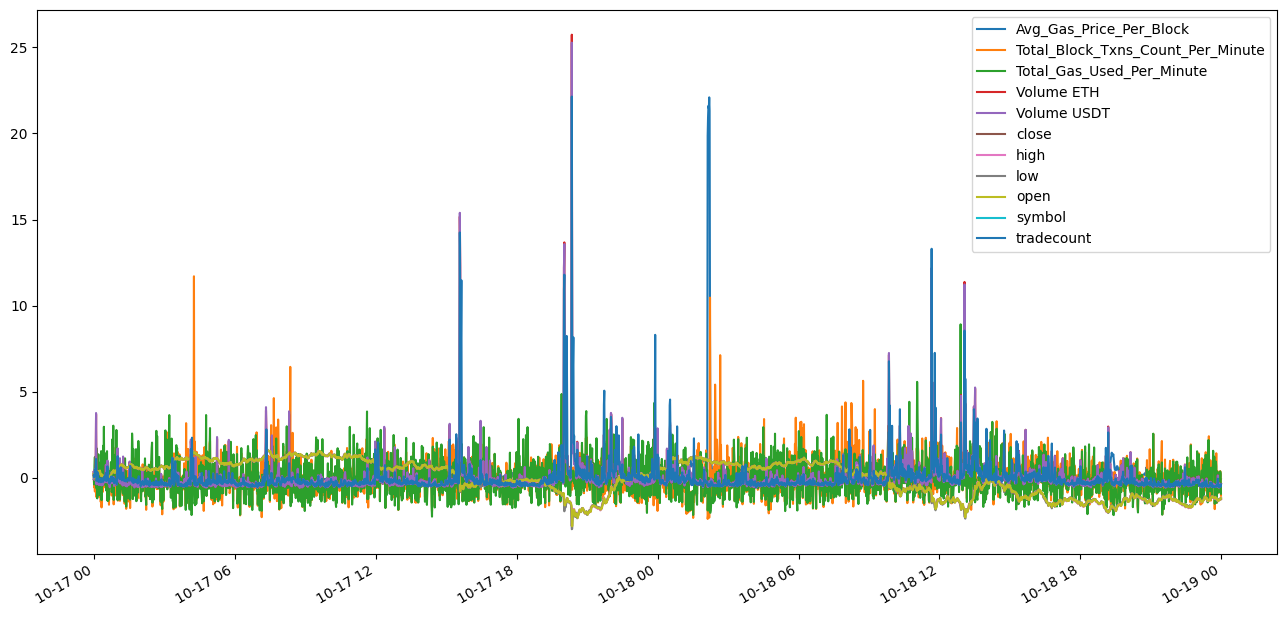

In [ ]:
df_full_sample_standardized = (df - df.mean(numeric_only=True)) / df.std(numeric_only=True)

df_full_sample_standardized.plot(figsize=(16,8))

<Axes: >

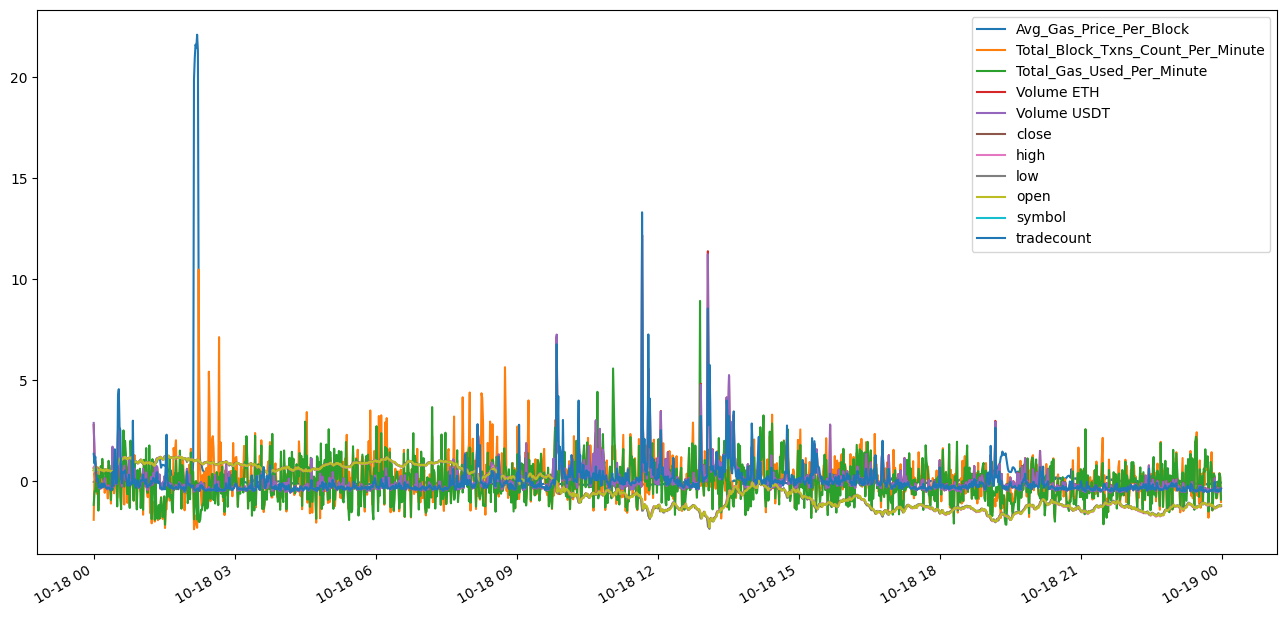

In [ ]:
df_full_sample_standardized.loc['10-18-2021'].plot(figsize=(16,8))

<Axes: >

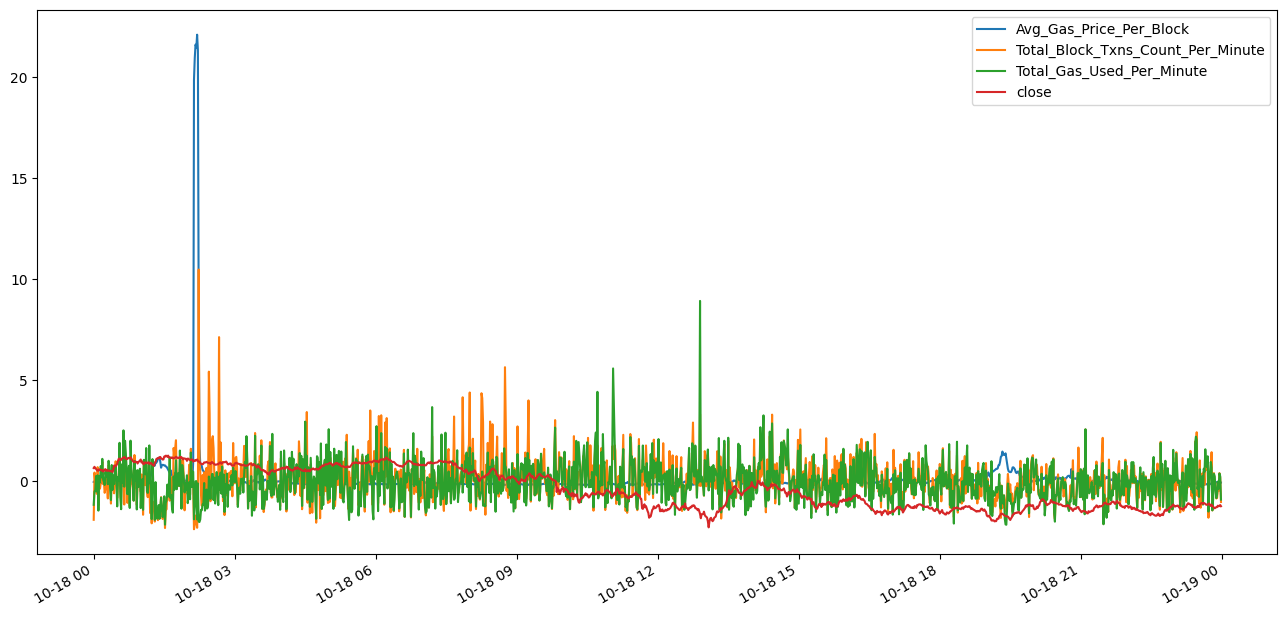

In [ ]:
df_full_sample_standardized.loc['10-18-2021', ['Avg_Gas_Price_Per_Block',
                                               'Total_Block_Txns_Count_Per_Minute',
                                               'Total_Gas_Used_Per_Minute',
                                               'close']].plot(figsize=(16,8))

In [ ]:
df_full_sample_standardized.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2851 entries, 2021-10-17 00:00:00 to 2021-10-18 23:59:00
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Avg_Gas_Price_Per_Block            2851 non-null   float64
 1   Total_Block_Txns_Count_Per_Minute  2851 non-null   float64
 2   Total_Gas_Used_Per_Minute          2851 non-null   float64
 3   Volume ETH                         2851 non-null   float64
 4   Volume USDT                        2851 non-null   float64
 5   close                              2851 non-null   float64
 6   high                               2851 non-null   float64
 7   low                                2851 non-null   float64
 8   open                               2851 non-null   float64
 9   symbol                             0 non-null      object 
 10  tradecount                         2851 non-null   float64
dtypes: float64(10), obje

In [ ]:
df_full_sample_standardized.drop(columns=['symbol'], inplace=True)

df.drop(columns=['symbol'], inplace=True)


df_full_sample_standardized

,Avg_Gas_Price_Per_Block,Total_Block_Txns_Count_Per_Minute,Total_Gas_Used_Per_Minute,Volume ETH,Volume USDT,close,high,low,open,tradecount
2021-10-17 00:00:00,-0.067455,0.328676,0.227207,0.340670,0.353807,0.158458,0.203730,0.186971,0.226969,0.076909
2021-10-17 00:01:00,-0.082622,-0.539832,-0.378359,0.047645,0.053316,0.144468,0.179532,0.156062,0.157665,0.182111
2021-10-17 00:02:00,-0.108997,0.138787,0.774859,-0.111027,-0.109035,0.212521,0.189281,0.141888,0.144012,0.081690
2021-10-17 00:03:00,-0.089482,-0.785754,1.216538,0.499026,0.514029,0.056033,0.189107,0.074434,0.212106,0.417383
2021-10-17 00:04:00,-0.075858,0.188594,0.272050,0.262821,0.271300,-0.081628,0.041137,-0.040152,0.055179,0.509196
...,...,...,...,...,...,...,...,...,...,...
2021-10-18 23:55:00,-0.047574,-0.424654,-0.020830,-0.311127,-0.320240,-1.213144,-1.245853,-1.228531,-1.286128,-0.405111
2021-10-18 23:56:00,-0.076565,-0.486913,-0.378187,-0.508207,-0.517655,-1.244062,-1.261520,-1.202574,-1.217689,-0.511270
2021-10-18 23:57:00,-0.086477,0.397160,0.378975,-0.455769,-0.465087,-1.222471,-1.233667,-1.188571,-1.245687,-0.438585
2021-10-18 23:58:00,-0.069511,0.185481,0.244361,-0.430451,-0.439700,-1.181363,-1.230534,-1.179008,-1.223911,-0.505532


$\rule{800pt}{20pt}$

#Feature Engineering and Preparing Data for Training
<br>

- The goal of this project is to predict the <b>Total_Gas_Used_Per_Minute</b> (target variable) using the other variables (predictor variables).

- The aim is to manually feature engineer (not using PCA), at least three new features from the predictor variables that are at least $5\%$ correlated (in absolute value) with the target variable.

- We will create a time-series split of data the into a "sub-training", "validation", and "testing" set using an $80\%, 20\%$ split of the data.

- We will then Ssandardize the data (subtract the mean and divide the standard deviation), and be sure not to include a look-ahead bias when doing the standardization.

In [ ]:
tf.keras.utils.set_random_seed(42)

# Compute lagged predictor variables
lagged_predictors = df_full_sample_standardized.shift()

# Compute correlation between lagged predictor variables and target variable
correlation_matrix = abs(lagged_predictors.corr()[['Total_Gas_Used_Per_Minute']])

correlation_matrix_sorted = correlation_matrix.sort_values(by='Total_Gas_Used_Per_Minute', ascending=False)

# Filter features with at least 5% correlation
relevant_features = correlation_matrix_sorted[correlation_matrix_sorted['Total_Gas_Used_Per_Minute'] >= 0.05].index.tolist()

correlation_matrix_sorted, relevant_features


# Manually engineer new features
# For example, let's create three new features by adding, subtracting, and multiplying existing features

df_full_sample_standardized['New_Feature_1'] = df_full_sample_standardized['Avg_Gas_Price_Per_Block'] + df_full_sample_standardized['Total_Block_Txns_Count_Per_Minute']
df_full_sample_standardized['New_Feature_2'] = df_full_sample_standardized['Avg_Gas_Price_Per_Block'] - df_full_sample_standardized['Total_Block_Txns_Count_Per_Minute']
df_full_sample_standardized['New_Feature_3'] = df_full_sample_standardized['Avg_Gas_Price_Per_Block'] * df_full_sample_standardized['tradecount']

# Create time-series split
# percentage of the data used to train in a time-series split
training_percentage = 0.8

# number of samples, number of training samples, number of years in training set, number of years in testing set
df_full_sample_standardized.shape[0], round(df_full_sample_standardized.shape[0]* training_percentage), round(df_full_sample_standardized.shape[0]* training_percentage) / 12, (df_full_sample_standardized.shape[0] - round(df_full_sample_standardized.shape[0]* training_percentage)) / 12

# split data sample into (X_{t-1}, Y_t)
X = df_full_sample_standardized.drop(columns=['Total_Gas_Used_Per_Minute'])
Y = df_full_sample_standardized[['Total_Gas_Used_Per_Minute']]

# split (X_{t-1}, Y_t) into time-series training and testing sets
X_train = X.iloc[0: round(df_full_sample_standardized.shape[0]* training_percentage)]
X_test = X.iloc[round(df_full_sample_standardized.shape[0]* training_percentage):]

Y_train = Y.iloc[0: round(df_full_sample_standardized.shape[0]* training_percentage)]
Y_test = Y.iloc[round(df_full_sample_standardized.shape[0]* training_percentage):]

X_sub_train = X_train.iloc[0: round(X_train.shape[0]* training_percentage)]
Y_sub_train = Y_train.iloc[0: round(X_train.shape[0]* training_percentage)]

X_validation = X_train.iloc[round(X_train.shape[0]* training_percentage):]
Y_validation = Y_train.iloc[round(X_train.shape[0]* training_percentage):]


# Standardize the data
mean_train = X_train.mean()
std_train = X_train.std()

X_train_standardized = (X_train - mean_train) / std_train
X_validation_standardized = (X_validation - mean_train) / std_train
X_test_standardized = (X_test - mean_train) / std_train

mean_Y_train = Y_train.mean()
std_Y_train = Y_train.std()

Y_train_standardized = (Y_train - mean_Y_train) / std_Y_train
Y_validation_standardized = (Y_validation - mean_Y_train) / std_Y_train
Y_test_standardized = (Y_test - mean_Y_train) / std_Y_train





In [ ]:
tf.keras.utils.set_random_seed(42)
correlation_matrix_sorted, relevant_features

(                                   Total_Gas_Used_Per_Minute
 Total_Gas_Used_Per_Minute                           1.000000
 Total_Block_Txns_Count_Per_Minute                   0.689470
 Avg_Gas_Price_Per_Block                             0.093526
 tradecount                                          0.069605
 Volume USDT                                         0.063060
 Volume ETH                                          0.062901
 low                                                 0.016836
 close                                               0.015792
 high                                                0.013652
 open                                                0.013371,
 ['Total_Gas_Used_Per_Minute',
  'Total_Block_Txns_Count_Per_Minute',
  'Avg_Gas_Price_Per_Block',
  'tradecount',
  'Volume USDT',
  'Volume ETH'])

# Baseline Model with PCA and Linear Regression
<br>

- Using the processed and engineered data from the previous section, we will implement a baseline linear model with Keras.

- We will have two linear baseline models: one with features from the previous question, the second baseline model will have features that we algorithmically engineer from PCA.

- We will then test out 3 different numbers of principal components and determine which number of components performs best in the linear baseline model.

- Finally, we will decide which baseline performs best: the PCA + linear model, or the engineered features + linear model?

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

# Fit the scaler
X_train_norm = X_train_standardized

X_validation_norm = X_validation_standardized


Y_train_norm = Y_train_standardized
Y_validation_norm = Y_validation_standardized


# PCA
history_data = {}
pca_models = {}
pca_losses = {}
number_of_components = [2, 3, 4]

for num in number_of_components:
  print("Now starting for:", num, "of components")

  pca = PCA(n_components=num)
  X_train_pca = pca.fit_transform(X_train_norm)
  X_validation_pca = pca.transform(X_validation_norm)


  # Build linear regression model for PCA
  model_pca = Sequential([
      Dense(1, input_dim=num, activation='linear')
  ])
  model_pca.compile(optimizer=Adam(), loss='mse')


  history_pca = model_pca.fit(X_train_pca, Y_train_norm, epochs=50, validation_data=(X_validation_pca, Y_validation_norm), verbose=0)
  pca_models[num] = (model_pca)
  history_data[num] = history_pca.history

  pca_losses[num] = model_pca.evaluate(X_validation_pca, Y_validation_norm, verbose=0)

  print(f"Validation Loss for {num} PCA components: {pca_losses[num]}")


# manually engineered
model_engineered = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='linear')
])
model_engineered.compile(optimizer=Adam(), loss='mse')
history_engineered = model_engineered.fit(X_train_norm, Y_train_norm, epochs=50, validation_data=(X_validation_norm, Y_validation_norm), verbose=0)

engineered_loss = model_engineered.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Validation Loss for Manually Engineered Model: {engineered_loss}")

# Validation Loss for 2 PCA components: 1.0618349313735962
# Validation Loss for 3 PCA components: 1.060102105140686
# Validation Loss for 4 PCA components: 0.6243734359741211
# Validation Loss for Manually Engineered Model: 0.6241200566291809

# Mannually engineered model performs best (least loss)

Now starting for: 2 of components
Validation Loss for 2 PCA components: 1.0618349313735962
Now starting for: 3 of components
Validation Loss for 3 PCA components: 1.060102105140686
Now starting for: 4 of components
Validation Loss for 4 PCA components: 0.6243734359741211
Validation Loss for Manually Engineered Model: 0.6241200566291809


# Dense Neural Networks to Predict and Testing Different Loss Functions
<br>

- To increase complexity, we will build a dense network with 4 hidden layers and 15 neurons each.

- We will train the model using four different loss functions and identify which loss function performed best when training the model?

In [ ]:
import shutil
shutil.rmtree('random_search/Gas_Prediction', ignore_errors=True)

In [ ]:
!pip install keras-tuner

from kerastuner.tuners import RandomSearch

tf.keras.utils.set_random_seed(42)

def build_model(hp):
  model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=15, activation="swish", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(units=15, activation="swish", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(units=15, activation="swish", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(units=15, activation="swish", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(units=1)
    ])

  loss_choice = hp.Choice('loss', ['mean_squared_error', 'mean_absolute_error', 'huber', 'mean_squared_logarithmic_error'])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                loss=loss_choice
  )

  return model

input_shape = X_sub_train.shape[1]  # Placeholder for the number of input features
MAX_TRIALS = 15  # The maximum number of configurations to try
EXECUTIONS_PER_TRIAL = 2  # The number of models that should be built and fit for each trial for robustness

random_tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTIONS_PER_TRIAL,
    directory='random_search',
    project_name='Gas_Prediction'
)

random_tuner.search(X_sub_train, Y_sub_train, epochs=300, batch_size=32, validation_data=(X_validation, Y_validation))

# best loss function: mean_squared_logarithmic_error

Trial 4 Complete [00h 03m 48s]
val_loss: 0.5883013010025024

Best val_loss So Far: 0.08791545778512955
Total elapsed time: 00h 13m 04s


In [ ]:
random_tuner.results_summary()

Results summary
Results in random_search/Gas_Prediction
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 00 summary
Hyperparameters:
loss: mean_squared_logarithmic_error
Score: 0.08791545778512955

Trial 02 summary
Hyperparameters:
loss: huber
Score: 0.2157571017742157

Trial 01 summary
Hyperparameters:
loss: mean_absolute_error
Score: 0.48989206552505493

Trial 03 summary
Hyperparameters:
loss: mean_squared_error
Score: 0.5883013010025024


#Train Five Different Architectures and Motivate Each One
<br>

- We will build five different architectures using dense layers using sequential and functional APIs and identify which architecture performed the best?

In [ ]:
# Model 1 - Baseline Sequential Model

tf.keras.utils.set_random_seed(42)

def build_sequential_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    return model

model = build_sequential_model(X_train.shape[1])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

val_loss = model.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

# val loss: 0.5514070987701416

# Motivation: To establish baseline with a more general straightfoward model for comparison.



Val Loss: 0.5514070987701416


In [ ]:
# Model 2 - Deep Sequential Model

tf.keras.utils.set_random_seed(42)

def build_deep_sequential_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_deep_sequential_model(X_train.shape[1])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

val_loss = model.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

# val loss: 0.5436500906944275

# Motivation: Deeper network may be able to capture more complex patterns.


Val Loss: 0.5436500906944275


In [ ]:
# Model 3 - Wide Sequential Model

tf.keras.utils.set_random_seed(42)

def build_wide_sequential_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_wide_sequential_model(X_train.shape[1])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

val_loss = model.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

# val Loss: 0.5369270443916321

# Motivation: Wider network may be able to capture more complex patterns and avoid pitfalls associated with deep networks. More straightfoward due to less layers.

Val Loss: 0.5369270443916321


In [ ]:
# Model 4 - Functional Model with branching

tf.keras.utils.set_random_seed(42)

input_shape = X.shape[1]

# Input layer
inputs = tf.keras.layers.Input(shape=(input_shape,))

# Branch 1
x1 = tf.keras.layers.Dense(32, activation='relu')(inputs)
x1 = tf.keras.layers.Dense(16, activation='relu')(x1)

# Branch 2
x2 = tf.keras.layers.Dense(32, activation='relu')(inputs)
x2 = tf.keras.layers.Dense(16, activation='relu')(x2)
x2 = tf.keras.layers.Dense(8, activation='relu')(x2)

# Merge branches
merged = tf.keras.layers.concatenate([x1, x2])

# Output layer
outputs = tf.keras.layers.Dense(1)(merged)

# Create model
model1 = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='multi_branch_model')

model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history1 = model1.fit(X_sub_train, Y_sub_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

# Evaluate the model
val_loss = model1.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

# val loss: 0.6327312588691711

# Branching captures more interactions than a single path and learns more from one input due to multiple paths.

Val Loss: 0.6327312588691711


In [ ]:
# Model 5 - Functional Model with Skip connections

tf.keras.utils.set_random_seed(42)

# Input layer
inputs = tf.keras.layers.Input(shape=(input_shape,))

# Main path
x = tf.keras.layers.Dense(48, activation='relu')(inputs)
x = tf.keras.layers.Dense(48, activation='relu')(x)

# Skip connection
skip = tf.keras.layers.Dense(48, activation='relu')(inputs)
x = tf.keras.layers.add([x, skip])

# Further processing
x = tf.keras.layers.Dense(16, activation='relu')(x)

# Output layer
outputs = tf.keras.layers.Dense(1)(x)

# Create model
model2 = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='skip_connection_model')

model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history2 = model2.fit(X_sub_train, Y_sub_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

# Evaluate the model
val_loss = model2.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

# val loss: 0.5963260531425476

# Motivation: Using a skip connection can help avoid the vanishing gradient problem.


Val Loss: 0.5963260531425476


In [ ]:
# Model 3 - Wide Sequential Model is the best performing architecture due to the lowest loss.

# Analyze the Layers of The Best Performing Architecture
<br>
- We will extract the features within each hidden layer of the best performing architecture (The Deep Sequential Model) and compute the correlation of their hidden features with the target variable. We will then compute the correlation of these hidden features with the feature that has the lowest correlation with the target variable to understand what the model is doing.

In [ ]:
# The best performing architecture is the wide sequential model.
# It only has one hidden layer.

# Model 3 - Wide Sequential Model

tf.keras.utils.set_random_seed(42)

def build_wide_sequential_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_wide_sequential_model(X_train.shape[1])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

val_loss = model.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

model

Val Loss: 0.5369270443916321


In [ ]:
model.inputs

[<KerasTensor: shape=(None, 12) dtype=float32 (created by layer 'input_7')>]

In [ ]:
model.layers

In [ ]:
model.layers[1].input

<KerasTensor: shape=(None, 12) dtype=float32 (created by layer 'normalization_4')>

In [ ]:
model.layers[1].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_28')>

In [ ]:
first_hidden_layer = model.layers[1]

first_hidden_layer.get_weights()

[array([[ 1.89907730e-01,  9.36444253e-02, -2.16492325e-01,
          2.61302918e-01, -2.68199712e-01,  9.67289731e-02,
          2.45335937e-01, -5.33644617e-01, -1.33175058e-02,
         -2.01173164e-02, -1.57603428e-01,  1.71682149e-01,
          2.24631265e-01, -1.87174063e-02, -2.81272996e-02,
         -3.65249030e-02, -4.61111397e-01, -4.00267273e-01,
         -1.06727764e-01, -4.22285825e-01, -3.82455260e-01,
          1.96998850e-01,  1.75440758e-01, -1.94657847e-01,
         -5.15331388e-01, -3.28707635e-01,  2.59261869e-04,
          1.17157951e-01, -1.56877622e-01, -1.52875513e-01,
         -3.36434245e-02, -5.02256215e-01, -8.03864717e-01,
         -7.70559430e-01, -5.63880727e-02, -4.42406863e-01,
          1.46794230e-01, -1.25597551e-01,  1.76145867e-01,
          3.61449540e-01, -2.66662955e-01, -1.07507952e-01,
         -1.02596514e-01, -2.44030014e-01,  2.04665154e-01,
         -6.44901752e-01,  1.07270740e-02, -2.22025901e-01,
         -2.14211255e-01,  1.65112972e-0

In [ ]:
kernel, bias = first_hidden_layer.get_weights()

kernel.shape

(12, 64)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 12)                25        
 tion)                                                           
                                                                 
 dense_28 (Dense)            (None, 64)                832       
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 922 (3.61 KB)
Trainable params: 897 (3.50 KB)
Non-trainable params: 25 (104.00 Byte)
_________________________________________________________________


In [ ]:
feature_extractor = tf.keras.Model(inputs=model.inputs,
                                   outputs=[model.layers[0].output, # normalization layer
                                            model.layers[1].output, # hidden layer
                                            model.layers[2].output]) # output layer

In [ ]:
sample_data = X_train.iloc[0]

feature_extractor(sample_data)

[<tf.Tensor: shape=(1, 12), dtype=float32, numpy=
 array([[-0.06745515,  0.32867596,  0.3406699 ,  0.3538068 ,  0.1584582 ,
          0.20372988,  0.18697087,  0.22696859,  0.07690855,  0.2612208 ,
         -0.39613113, -0.00518788]], dtype=float32)>,
 <tf.Tensor: shape=(1, 64), dtype=float32, numpy=
 array([[0.        , 0.24127655, 0.        , 0.        , 0.        ,
         0.19216931, 0.        , 0.15018576, 0.        , 0.35156673,
         0.        , 0.        , 0.13409704, 0.        , 0.        ,
         0.27799845, 0.        , 0.48827124, 0.        , 0.17231603,
         0.00903701, 0.        , 0.02992364, 0.07502428, 0.15310147,
         0.14634185, 0.        , 0.16788888, 0.        , 0.        ,
         0.0514957 , 0.02279016, 0.06435212, 0.20800106, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.17178215, 0.20585428, 0.03842057, 0.09743657,
         0.14693563, 0.        , 0.28315103, 0.        , 0.        ,
        

In [ ]:
processed_features = feature_extractor(sample_data)

np.squeeze(processed_features[0].numpy())


array([-0.06745515,  0.32867596,  0.3406699 ,  0.3538068 ,  0.1584582 ,
        0.20372988,  0.18697087,  0.22696859,  0.07690855,  0.2612208 ,
       -0.39613113, -0.00518788], dtype=float32)

In [ ]:
layer_1_feature_representations = pd.DataFrame(feature_extractor(X_train)[1].numpy(), index=X_train.index)

layer_1_data = pd.concat([layer_1_feature_representations, Y_train], axis=1)

layer_1_data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Total_Gas_Used_Per_Minute
2021-10-17 00:00:00,0.000000,0.241277,0.000000,0.000000,0.000000,0.192169,0.000000,0.150186,0.000000,0.351567,...,0.000000,0.002228,0.000000,0.235494,0.0,0.217145,0.00000,0.065285,0.138834,0.227207
2021-10-17 00:01:00,0.151589,0.517948,0.000000,0.259978,0.008683,0.323987,0.000000,0.079607,0.170528,0.535991,...,0.136420,0.000000,0.015717,0.495058,0.0,0.000000,0.16206,0.000000,0.000000,-0.378359
2021-10-17 00:02:00,0.000000,0.337227,0.000000,0.000000,0.038735,0.215397,0.000000,0.213041,0.072657,0.349200,...,0.000000,0.000000,0.132261,0.493355,0.0,0.188476,0.00000,0.000000,0.008734,0.774859
2021-10-17 00:03:00,0.305558,0.546539,0.005832,0.452206,0.000000,0.261198,0.000000,0.015015,0.000000,0.653252,...,0.151107,0.000000,0.000000,0.305971,0.0,0.000000,0.00000,0.000000,0.000000,1.216538
2021-10-17 00:04:00,0.000000,0.312493,0.044834,0.104554,0.000000,0.019004,0.000000,0.191850,0.000000,0.360753,...,0.000000,0.000000,0.000000,0.098215,0.0,0.190741,0.00000,0.136505,0.000000,0.272050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18 14:18:00,0.536042,0.782640,0.000000,0.520394,0.180139,0.658189,0.000000,0.000000,0.700192,0.879797,...,0.435530,0.000000,0.393813,0.641053,0.0,0.000000,0.45967,0.000000,0.000000,-1.269683
2021-10-18 14:19:00,0.170314,0.447140,0.095335,0.195988,0.071068,0.262239,0.000000,0.133891,0.205076,0.555143,...,0.021948,0.000000,0.173941,0.221139,0.0,0.000000,0.00000,0.000000,0.000000,-0.267445
2021-10-18 14:20:00,0.000000,0.081426,0.177847,0.000000,0.100085,0.000000,0.157319,0.332337,0.000000,0.152027,...,0.000000,0.000000,0.175140,0.000000,0.0,0.478681,0.00000,0.348426,0.000000,0.502378
2021-10-18 14:21:00,0.399811,0.569110,0.140756,0.434453,0.016389,0.345112,0.000000,0.021465,0.264800,0.711521,...,0.176313,0.000000,0.060464,0.092594,0.0,0.000000,0.00000,0.000000,0.000000,-0.966621


In [ ]:
layer_1_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2281.0,0.147544,0.512335,0.000000,0.000000,0.000000,0.177151,9.317350
1,2281.0,0.390130,0.255542,0.000000,0.199849,0.392610,0.563721,2.092420
2,2281.0,0.195651,0.531518,0.000000,0.000000,0.000000,0.088607,10.749398
3,2281.0,0.186018,0.415762,0.000000,0.000000,0.018035,0.261813,8.202477
4,2281.0,0.124371,0.101443,0.000000,0.038252,0.132908,0.189496,1.281229
...,...,...,...,...,...,...,...,...
60,2281.0,0.243512,0.353786,0.000000,0.000000,0.105190,0.384580,5.231926
61,2281.0,0.481548,0.704812,0.000000,0.000000,0.274036,0.834176,10.417743
62,2281.0,0.182189,0.543886,0.000000,0.000000,0.000000,0.109900,10.563504
63,2281.0,0.188243,0.244185,0.000000,0.000000,0.128628,0.309863,2.992245


In [ ]:
layer_1_data.corr()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Total_Gas_Used_Per_Minute
0,1.000000,0.382078,0.313054,0.805732,0.361504,0.462015,0.854499,-0.212459,0.018983,0.294660,...,0.343793,-0.034647,-0.170675,-0.222461,-0.004995,-0.142405,0.589740,0.569123,0.255908,-0.198934
1,0.382078,1.000000,-0.313422,0.334838,0.327528,0.873023,0.066616,-0.728013,0.751727,0.348248,...,0.891966,-0.184929,0.079693,0.429447,-0.187924,-0.631301,0.728253,-0.235216,-0.121075,-0.701904
2,0.313054,-0.313422,1.000000,0.588566,-0.259289,-0.356006,0.463162,-0.003674,-0.252700,0.566294,...,-0.268416,0.076387,-0.233347,-0.476785,-0.016953,-0.023187,-0.251526,0.849014,-0.248028,0.120171
3,0.805732,0.334838,0.588566,1.000000,0.034859,0.253235,0.589817,-0.290082,0.032449,0.517314,...,0.322450,0.024038,-0.294854,-0.211770,0.029218,-0.162833,0.356583,0.730008,0.000880,-0.273062
4,0.361504,0.327528,-0.259289,0.034859,1.000000,0.645669,0.335065,-0.095396,0.489614,-0.174815,...,0.320081,-0.229476,0.724821,0.201679,-0.059174,-0.095302,0.504482,-0.063045,0.243257,-0.100080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.142405,-0.631301,-0.023187,-0.162833,-0.095302,-0.493341,-0.015911,0.895761,-0.519699,-0.617331,...,-0.454243,0.183218,-0.056116,-0.076325,0.687806,1.000000,-0.263589,0.212640,0.602429,0.526916
61,0.589740,0.728253,-0.251526,0.356583,0.504482,0.842429,0.424147,-0.375708,0.425631,-0.080328,...,0.807632,-0.055093,0.036909,0.518577,-0.097717,-0.263589,1.000000,0.028070,0.399030,-0.362135
62,0.569123,-0.235216,0.849014,0.730008,-0.063045,-0.194407,0.689621,0.165843,-0.304334,0.319167,...,-0.142406,0.077391,-0.277387,-0.422532,0.207265,0.212640,0.028070,1.000000,0.099221,0.157210
63,0.255908,-0.121075,-0.248028,0.000880,0.243257,0.127220,0.285709,0.385279,-0.291576,-0.605496,...,0.020971,0.363227,-0.095091,0.301096,0.382459,0.602429,0.399030,0.099221,1.000000,0.203781


In [ ]:
layer_1_data.corr()[['Total_Gas_Used_Per_Minute']].sort_values(by='Total_Gas_Used_Per_Minute')

,Total_Gas_Used_Per_Minute
1,-0.701904
34,-0.643046
42,-0.632107
55,-0.605006
8,-0.570446
...,...
17,0.524908
60,0.526916
25,0.566782
7,0.658186


In [ ]:
# Correlations are high. Very few low correlations (absolute value less than 0.05).
# More positive correlations
# High correlations show that the model is focusing on features that have strong correlation with the target variable.

In [ ]:
# Layers vs Features

In [ ]:
layer_1_feature_representations = pd.DataFrame(feature_extractor(X_train)[1].numpy(), index=X_train.index)

layer_1_open = pd.concat([layer_1_feature_representations, X_train[['open']]], axis=1)

layer_1_open

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,open
2021-10-17 00:00:00,0.000000,0.241277,0.000000,0.000000,0.000000,0.192169,0.000000,0.150186,0.000000,0.351567,...,0.000000,0.002228,0.000000,0.235494,0.0,0.217145,0.00000,0.065285,0.138834,0.226969
2021-10-17 00:01:00,0.151589,0.517948,0.000000,0.259978,0.008683,0.323987,0.000000,0.079607,0.170528,0.535991,...,0.136420,0.000000,0.015717,0.495058,0.0,0.000000,0.16206,0.000000,0.000000,0.157665
2021-10-17 00:02:00,0.000000,0.337227,0.000000,0.000000,0.038735,0.215397,0.000000,0.213041,0.072657,0.349200,...,0.000000,0.000000,0.132261,0.493355,0.0,0.188476,0.00000,0.000000,0.008734,0.144012
2021-10-17 00:03:00,0.305558,0.546539,0.005832,0.452206,0.000000,0.261198,0.000000,0.015015,0.000000,0.653252,...,0.151107,0.000000,0.000000,0.305971,0.0,0.000000,0.00000,0.000000,0.000000,0.212106
2021-10-17 00:04:00,0.000000,0.312493,0.044834,0.104554,0.000000,0.019004,0.000000,0.191850,0.000000,0.360753,...,0.000000,0.000000,0.000000,0.098215,0.0,0.190741,0.00000,0.136505,0.000000,0.055179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18 14:18:00,0.536042,0.782640,0.000000,0.520394,0.180139,0.658189,0.000000,0.000000,0.700192,0.879797,...,0.435530,0.000000,0.393813,0.641053,0.0,0.000000,0.45967,0.000000,0.000000,-0.264723
2021-10-18 14:19:00,0.170314,0.447140,0.095335,0.195988,0.071068,0.262239,0.000000,0.133891,0.205076,0.555143,...,0.021948,0.000000,0.173941,0.221139,0.0,0.000000,0.00000,0.000000,0.000000,-0.308448
2021-10-18 14:20:00,0.000000,0.081426,0.177847,0.000000,0.100085,0.000000,0.157319,0.332337,0.000000,0.152027,...,0.000000,0.000000,0.175140,0.000000,0.0,0.478681,0.00000,0.348426,0.000000,-0.319336
2021-10-18 14:21:00,0.399811,0.569110,0.140756,0.434453,0.016389,0.345112,0.000000,0.021465,0.264800,0.711521,...,0.176313,0.000000,0.060464,0.092594,0.0,0.000000,0.00000,0.000000,0.000000,-0.456561


In [ ]:
layer_1_open.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2281.0,0.147544,0.512335,0.000000,0.000000,0.000000,0.177151,9.317350
1,2281.0,0.390130,0.255542,0.000000,0.199849,0.392610,0.563721,2.092420
2,2281.0,0.195651,0.531518,0.000000,0.000000,0.000000,0.088607,10.749398
3,2281.0,0.186018,0.415762,0.000000,0.000000,0.018035,0.261813,8.202477
4,2281.0,0.124371,0.101443,0.000000,0.038252,0.132908,0.189496,1.281229
...,...,...,...,...,...,...,...,...
60,2281.0,0.243512,0.353786,0.000000,0.000000,0.105190,0.384580,5.231926
61,2281.0,0.481548,0.704812,0.000000,0.000000,0.274036,0.834176,10.417743
62,2281.0,0.182189,0.543886,0.000000,0.000000,0.000000,0.109900,10.563504
63,2281.0,0.188243,0.244185,0.000000,0.000000,0.128628,0.309863,2.992245


In [ ]:
layer_1_open.corr()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,open
0,1.000000,0.382078,0.313054,0.805732,0.361504,0.462015,0.854499,-0.212459,0.018983,0.294660,...,0.343793,-0.034647,-0.170675,-0.222461,-0.004995,-0.142405,0.589740,0.569123,0.255908,-0.172273
1,0.382078,1.000000,-0.313422,0.334838,0.327528,0.873023,0.066616,-0.728013,0.751727,0.348248,...,0.891966,-0.184929,0.079693,0.429447,-0.187924,-0.631301,0.728253,-0.235216,-0.121075,0.316729
2,0.313054,-0.313422,1.000000,0.588566,-0.259289,-0.356006,0.463162,-0.003674,-0.252700,0.566294,...,-0.268416,0.076387,-0.233347,-0.476785,-0.016953,-0.023187,-0.251526,0.849014,-0.248028,-0.642275
3,0.805732,0.334838,0.588566,1.000000,0.034859,0.253235,0.589817,-0.290082,0.032449,0.517314,...,0.322450,0.024038,-0.294854,-0.211770,0.029218,-0.162833,0.356583,0.730008,0.000880,-0.182114
4,0.361504,0.327528,-0.259289,0.034859,1.000000,0.645669,0.335065,-0.095396,0.489614,-0.174815,...,0.320081,-0.229476,0.724821,0.201679,-0.059174,-0.095302,0.504482,-0.063045,0.243257,0.109257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.142405,-0.631301,-0.023187,-0.162833,-0.095302,-0.493341,-0.015911,0.895761,-0.519699,-0.617331,...,-0.454243,0.183218,-0.056116,-0.076325,0.687806,1.000000,-0.263589,0.212640,0.602429,0.161333
61,0.589740,0.728253,-0.251526,0.356583,0.504482,0.842429,0.424147,-0.375708,0.425631,-0.080328,...,0.807632,-0.055093,0.036909,0.518577,-0.097717,-0.263589,1.000000,0.028070,0.399030,0.495054
62,0.569123,-0.235216,0.849014,0.730008,-0.063045,-0.194407,0.689621,0.165843,-0.304334,0.319167,...,-0.142406,0.077391,-0.277387,-0.422532,0.207265,0.212640,0.028070,1.000000,0.099221,-0.433058
63,0.255908,-0.121075,-0.248028,0.000880,0.243257,0.127220,0.285709,0.385279,-0.291576,-0.605496,...,0.020971,0.363227,-0.095091,0.301096,0.382459,0.602429,0.399030,0.099221,1.000000,0.547527


In [ ]:
layer_1_open.corr()[['open']].sort_values(by='open')

,open
16,-0.868868
28,-0.862761
24,-0.858172
13,-0.834467
40,-0.757517
...,...
39,0.636278
32,0.657543
20,0.766370
58,0.803676


In [ ]:
# The feature "open" has the least correlation with the target variable.
# There is very high positive and negative correlation with the hideen layers which shows that the hidden layer is ensuring that its effect on the target variable is taken into adequate consideration.

#Tricks for Vanishing/Exploding Gradients

<br>

- In an effort to address the potential vanishing and exploding gradients problem, we will try 3 different tricks/techniques to address the potential vanishing/exploding gradients.

In [ ]:
# changing activation function
tf.keras.utils.set_random_seed(42)

def build_wide_sequential_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dense(64, activation='mish'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_wide_sequential_model(X_train.shape[1])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

val_loss = model.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

# val loss: 0.5381689071655273
# loss increased so not better.
# Mish gives better results but requires more compute but since the model is not complex it wouldn't increase compute time by a lot
# original val loss:  0.5369270443916321

Val Loss: 0.5381689071655273


In [ ]:
# batch normalization

tf.keras.utils.set_random_seed(42)

def build_wide_sequential_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dense(64, activation='swish', kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_wide_sequential_model(X_train.shape[1])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

val_loss = model.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

# batch normalization zero-centers and normalizes each input, then scales and shifts the result using two new parameter vectors per layer.
# val loss: 0.5657898783683777
# increased

Val Loss: 0.5657898783683777


In [ ]:
# grdient clipping

tf.keras.utils.set_random_seed(42)

def build_wide_sequential_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dense(64, activation='relu', kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1.0)
                  )
    return model

model = build_wide_sequential_model(X_train.shape[1])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

val_loss = model.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

# gradient clippings clip the gradients during backpropagation so that they never exceed some threshold.

# val loss: 0.6337401270866394
# increased

Val Loss: 0.6337401270866394


In [ ]:
# I decide to stick with my original model since it had the least loss.

#Tricks for Overfitting
<br>

- In an effort to address the potential overfitting problem, we will try 3 different tricks/techniques to address the potential problem of overfitting.

In [ ]:
# early stopping
# training will stop automatically when there is no more progress

tf.keras.utils.set_random_seed(42)

def build_wide_sequential_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dense(64, activation='mish'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_wide_sequential_model(X_train.shape[1])


early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10,
                                                           restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

val_loss = model.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

# original val loss:  0.5369270443916321
# val loss: 0.5381689071655273
# increased

Val Loss: 0.5381689071655273


In [ ]:
# drop out layer
# forces a neural network to learn more robust features that are useful with many different random subsets of the other neurons

tf.keras.utils.set_random_seed(42)

def build_wide_sequential_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_wide_sequential_model(X_train.shape[1])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

val_loss = model.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

# val loss: 0.5372573733329773

Val Loss: 0.5372573733329773


In [ ]:
# Max norm regularization
# Reduces over fitting and can help alleviate the unstable gradients problem

tf.keras.utils.set_random_seed(42)

def build_wide_sequential_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dense(64, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(1.0)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_wide_sequential_model(X_train.shape[1])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

val_loss = model.evaluate(X_validation_norm, Y_validation_norm, verbose=0)

print(f"Val Loss: {val_loss}")

# val loss: 0.535343587398529

Val Loss: 0.535343587398529


In [ ]:
# I decide to stick with my original model since it had the least loss.

# Hyperparameter Tuning
<br>

- We will tune 5 hyperparameters using Random, Bayesian, and Hyperband Search.

- We will then evaluate the untuned model, tuned model, and baseline model on the test set.

In [ ]:
import shutil
shutil.rmtree('random_search/Hyperparameters', ignore_errors=True)

In [ ]:
!pip install keras-tuner
import kerastuner as kt
from kerastuner.tuners import RandomSearch, BayesianOptimization

# The best model:
# The original model was the best one since it had the lowest loss.

tf.keras.utils.set_random_seed(42)

def build_wide_sequential_model(hp):

   model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(64, activation=hp.Choice('activation', values=['relu', 'mish', 'swish'])),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Dense(1)
        ])

   learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")

   loss = hp.Choice("loss", values=["mse", "huber", "mae"])

   optimizer = hp.Choice("optimizer", values=["sgd", "adam", "rmsprop"])
   if optimizer == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
   elif optimizer == "adam":
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
   elif optimizer == "rmsprop":
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

   model.compile(optimizer=optimizer, loss=loss)
   return model


MAX_TRIALS = 15  # The maximum number of configurations to try
EXECUTIONS_PER_TRIAL = 2  # The number of models that should be built and fit for each trial for robustness

random_search_tuner = RandomSearch(
    build_wide_sequential_model,
    objective='val_loss',
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTIONS_PER_TRIAL,
    directory='random_search',
    project_name='Hyperparameters'
)


random_search_tuner.search(X_sub_train, Y_sub_train, epochs=50, batch_size=32,
                           validation_data=(X_validation, Y_validation))



Trial 15 Complete [00h 00m 27s]
val_loss: 0.6143813729286194

Best val_loss So Far: 0.2027910128235817
Total elapsed time: 00h 09m 23s


In [ ]:
random_search_tuner.results_summary()

Results summary
Results in random_search/Hyperparameters
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 06 summary
Hyperparameters:
dropout_rate: 0.2
activation: swish
learning_rate: 0.007719014302211909
loss: huber
optimizer: rmsprop
Score: 0.2027910128235817

Trial 10 summary
Hyperparameters:
dropout_rate: 0.2
activation: swish
learning_rate: 0.00020374250387534263
loss: huber
optimizer: rmsprop
Score: 0.2120538428425789

Trial 08 summary
Hyperparameters:
dropout_rate: 0.5
activation: mish
learning_rate: 0.0015179129475516278
loss: huber
optimizer: rmsprop
Score: 0.21656490117311478

Trial 00 summary
Hyperparameters:
dropout_rate: 0.5
activation: swish
learning_rate: 0.0003635889277344135
loss: huber
optimizer: adam
Score: 0.22101812064647675

Trial 03 summary
Hyperparameters:
dropout_rate: 0.5
activation: mish
learning_rate: 0.00021601136044030822
loss: huber
optimizer: adam
Score: 0.22304507344961166

Trial 07 summary
Hyperparameters:
dropout_rate: 0.5
ac

In [ ]:
top_three_models = random_search_tuner.get_best_models(num_models=3)
top_three_models

In [ ]:
best_model = top_three_models[0]
best_model

In [ ]:
top_three_params = random_search_tuner.get_best_hyperparameters(num_trials=3)

{top_three_params[i]: top_three_params[i].values for i in range(len(top_three_params))}

{<keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters at 0x7a4e1030c520>: {'dropout_rate': 0.2,
  'activation': 'swish',
  'learning_rate': 0.007719014302211909,
  'loss': 'huber',
  'optimizer': 'rmsprop'},
 <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters at 0x7a4df9d08220>: {'dropout_rate': 0.2,
  'activation': 'swish',
  'learning_rate': 0.00020374250387534263,
  'loss': 'huber',
  'optimizer': 'rmsprop'},
 <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters at 0x7a4e097a8760>: {'dropout_rate': 0.5,
  'activation': 'mish',
  'learning_rate': 0.0015179129475516278,
  'loss': 'huber',
  'optimizer': 'rmsprop'}}

In [ ]:
best_hyperparams = top_three_params[0].values

best_hyperparams

{'dropout_rate': 0.2,
 'activation': 'swish',
 'learning_rate': 0.007719014302211909,
 'loss': 'huber',
 'optimizer': 'rmsprop'}

In [ ]:
best_model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
72/72 [==============================] - 2s 6ms/step - loss: 0.2066
Epoch 2/20
72/72 [==============================] - 0s 6ms/step - loss: 0.1978
Epoch 3/20
72/72 [==============================] - 0s 5ms/step - loss: 0.2042
Epoch 4/20
72/72 [==============================] - 1s 7ms/step - loss: 0.2065
Epoch 5/20
72/72 [==============================] - 0s 4ms/step - loss: 0.1984
Epoch 6/20
72/72 [==============================] - 0s 5ms/step - loss: 0.2043
Epoch 7/20
72/72 [==============================] - 0s 4ms/step - loss: 0.2043
Epoch 8/20
72/72 [==============================] - 0s 4ms/step - loss: 0.2072
Epoch 9/20
72/72 [==============================] - 0s 5ms/step - loss: 0.2059
Epoch 10/20
72/72 [==============================] - 0s 5ms/step - loss: 0.2117
Epoch 11/20
72/72 [==============================] - 0s 5ms/step - loss: 0.2064
Epoch 12/20
72/72 [==============================] - 0s 5ms/step - loss: 0.2036
Epoch 13/20
72/72 [==============================

In [ ]:
tf.keras.utils.set_random_seed(42)

bayesian_opt_tuner = kt.BayesianOptimization(build_wide_sequential_model,
                                            objective="val_loss",
                                            max_trials=15,
                                            executions_per_trial=2,
                                            overwrite=True,
                                            alpha=1e-4, beta=2.6)

bayesian_opt_tuner.search(X_sub_train, Y_sub_train, epochs=50, batch_size=32,
                           validation_data=(X_validation, Y_validation))

Trial 15 Complete [00h 00m 30s]
val_loss: 0.6143813729286194

Best val_loss So Far: 0.2027910128235817
Total elapsed time: 00h 09m 04s


In [ ]:
bayesian_opt_tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 06 summary
Hyperparameters:
dropout_rate: 0.2
activation: swish
learning_rate: 0.007719014302211909
loss: huber
optimizer: rmsprop
Score: 0.2027910128235817

Trial 10 summary
Hyperparameters:
dropout_rate: 0.2
activation: swish
learning_rate: 0.00020374250387534263
loss: huber
optimizer: rmsprop
Score: 0.2120538428425789

Trial 08 summary
Hyperparameters:
dropout_rate: 0.5
activation: mish
learning_rate: 0.0015179129475516278
loss: huber
optimizer: rmsprop
Score: 0.21656490117311478

Trial 00 summary
Hyperparameters:
dropout_rate: 0.5
activation: swish
learning_rate: 0.0003635889277344135
loss: huber
optimizer: adam
Score: 0.22101812064647675

Trial 03 summary
Hyperparameters:
dropout_rate: 0.5
activation: mish
learning_rate: 0.00021601136044030822
loss: huber
optimizer: adam
Score: 0.22304507344961166

Trial 07 summary
Hyperparameters:
dropout_rate: 0.5
activation: s

In [ ]:
top_three_models_b = bayesian_opt_tuner.get_best_models(num_models=3)
top_three_models_b

In [ ]:
best_model_b = top_three_models_b[0]

In [ ]:
top_three_params_b = bayesian_opt_tuner.get_best_hyperparameters(num_trials=3)

{top_three_params_b[i]: top_three_params_b[i].values for i in range(len(top_three_params_b))}

{<keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters at 0x7a4dfb0951b0>: {'dropout_rate': 0.2,
  'activation': 'swish',
  'learning_rate': 0.007719014302211909,
  'loss': 'huber',
  'optimizer': 'rmsprop'},
 <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters at 0x7a4dfaa4c1f0>: {'dropout_rate': 0.2,
  'activation': 'swish',
  'learning_rate': 0.00020374250387534263,
  'loss': 'huber',
  'optimizer': 'rmsprop'},
 <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters at 0x7a4dfacb9d50>: {'dropout_rate': 0.5,
  'activation': 'mish',
  'learning_rate': 0.0015179129475516278,
  'loss': 'huber',
  'optimizer': 'rmsprop'}}

In [ ]:
best_hyperparams_b = top_three_params_b[0].values

best_hyperparams_b

{'dropout_rate': 0.2,
 'activation': 'swish',
 'learning_rate': 0.007719014302211909,
 'loss': 'huber',
 'optimizer': 'rmsprop'}

In [ ]:
best_model_b.fit(X_train, Y_train, epochs=20)

Epoch 1/20
72/72 [==============================] - 1s 3ms/step - loss: 0.2066
Epoch 2/20
72/72 [==============================] - 0s 4ms/step - loss: 0.1978
Epoch 3/20
72/72 [==============================] - 0s 3ms/step - loss: 0.2042
Epoch 4/20
72/72 [==============================] - 0s 3ms/step - loss: 0.2065
Epoch 5/20
72/72 [==============================] - 0s 3ms/step - loss: 0.1984
Epoch 6/20
72/72 [==============================] - 0s 3ms/step - loss: 0.2043
Epoch 7/20
72/72 [==============================] - 0s 4ms/step - loss: 0.2043
Epoch 8/20
72/72 [==============================] - 0s 4ms/step - loss: 0.2072
Epoch 9/20
72/72 [==============================] - 0s 4ms/step - loss: 0.2059
Epoch 10/20
72/72 [==============================] - 0s 3ms/step - loss: 0.2117
Epoch 11/20
72/72 [==============================] - 0s 3ms/step - loss: 0.2064
Epoch 12/20
72/72 [==============================] - 0s 3ms/step - loss: 0.2036
Epoch 13/20
72/72 [==============================

In [ ]:
import shutil
shutil.rmtree('hyperband/Hp', ignore_errors=True)

In [ ]:
from kerastuner.tuners import Hyperband

Hyperband_tuner = kt.Hyperband(build_wide_sequential_model,
                               overwrite=True,
                               objective="val_loss", max_epochs=10, factor=3, directory='hyperband',
    project_name='Hp')

Hyperband_tuner.search(X_sub_train, Y_sub_train, epochs=10, batch_size=32,
                           validation_data=(X_validation, Y_validation))

Trial 30 Complete [00h 00m 04s]
val_loss: 0.5092309713363647

Best val_loss So Far: 0.21073901653289795
Total elapsed time: 00h 01m 42s


In [ ]:
Hyperband_tuner.results_summary()

Results summary
Results in hyperband/Hp
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0024 summary
Hyperparameters:
dropout_rate: 0.2
activation: swish
learning_rate: 0.0011020449848025574
loss: huber
optimizer: adam
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Score: 0.21073901653289795

Trial 0027 summary
Hyperparameters:
dropout_rate: 0.1
activation: swish
learning_rate: 0.0009211376149271358
loss: huber
optimizer: rmsprop
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.21427233517169952

Trial 0020 summary
Hyperparameters:
dropout_rate: 0.2
activation: swish
learning_rate: 0.0011020449848025574
loss: huber
optimizer: adam
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.2155439853668213

Trial 0025 summary
Hyperparameters:
dropout_rate: 0.1
activation: swish
learning_rate: 0.005863443315353961
loss: huber
optimizer: sgd
tuner/epochs: 10
tuner/i

In [ ]:
top_three_models_h = Hyperband_tuner.get_best_models(num_models=3)
top_three_models_h

In [ ]:
best_model_h = top_three_models_h[0]

In [ ]:
top_three_params_h = Hyperband_tuner.get_best_hyperparameters(num_trials=3)

{top_three_params_h[i]: top_three_params_h[i].values for i in range(len(top_three_params_h))}

{<keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters at 0x7a4df929af80>: {'dropout_rate': 0.2,
  'activation': 'swish',
  'learning_rate': 0.0011020449848025574,
  'loss': 'huber',
  'optimizer': 'adam',
  'tuner/epochs': 10,
  'tuner/initial_epoch': 4,
  'tuner/bracket': 1,
  'tuner/round': 1,
  'tuner/trial_id': '0020'},
 <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters at 0x7a4df8a8f940>: {'dropout_rate': 0.1,
  'activation': 'swish',
  'learning_rate': 0.0009211376149271358,
  'loss': 'huber',
  'optimizer': 'rmsprop',
  'tuner/epochs': 10,
  'tuner/initial_epoch': 0,
  'tuner/bracket': 0,
  'tuner/round': 0},
 <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters at 0x7a4df982cc70>: {'dropout_rate': 0.2,
  'activation': 'swish',
  'learning_rate': 0.0011020449848025574,
  'loss': 'huber',
  'optimizer': 'adam',
  'tuner/epochs': 4,
  'tuner/initial_epoch': 0,
  'tuner/bracket': 1,
  'tuner/round': 0}}

In [ ]:
best_hyperparams_h = top_three_params_b[0].values

best_hyperparams_h

{'dropout_rate': 0.2,
 'activation': 'swish',
 'learning_rate': 0.007719014302211909,
 'loss': 'huber',
 'optimizer': 'rmsprop'}

In [ ]:
best_model_h.fit(X_train, Y_train, epochs=20)

Epoch 1/20
72/72 [==============================] - 1s 2ms/step - loss: 0.2244
Epoch 2/20
72/72 [==============================] - 0s 2ms/step - loss: 0.2200
Epoch 3/20
72/72 [==============================] - 0s 2ms/step - loss: 0.2179
Epoch 4/20
72/72 [==============================] - 0s 2ms/step - loss: 0.2200
Epoch 5/20
72/72 [==============================] - 0s 2ms/step - loss: 0.2166
Epoch 6/20
72/72 [==============================] - 0s 2ms/step - loss: 0.2197
Epoch 7/20
72/72 [==============================] - 0s 2ms/step - loss: 0.2189
Epoch 8/20
72/72 [==============================] - 0s 2ms/step - loss: 0.2121
Epoch 9/20
72/72 [==============================] - 0s 2ms/step - loss: 0.2112
Epoch 10/20
72/72 [==============================] - 0s 3ms/step - loss: 0.2144
Epoch 11/20
72/72 [==============================] - 0s 3ms/step - loss: 0.2173
Epoch 12/20
72/72 [==============================] - 0s 3ms/step - loss: 0.2151
Epoch 13/20
72/72 [==============================

In [ ]:
# tuned model
tf.keras.utils.set_random_seed(42)

def build_wide_sequential_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(64, activation='swish'),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.007719014302211909), loss='huber')
    return model

model = build_wide_sequential_model(X_train.shape[1])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

test_loss = model.evaluate(X_test, Y_test, verbose=0)

print(f"Test Loss: {test_loss}")

# test loss: 0.1141696348786354

Test Loss: 0.1141696348786354


In [ ]:
# Untuned Model

tf.keras.utils.set_random_seed(42)

def build_wide_sequential_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=X_train.shape[1]),
        tf.keras.layers.Normalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_wide_sequential_model(X_train.shape[1])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_validation, Y_validation), verbose=0)

test_loss = model.evaluate(X_test, Y_test, verbose=0)

print(f"Test Loss: {test_loss}")
# test loss: 0.19640956819057465

Test Loss: 0.19640956819057465


In [ ]:
# Baseline model
model_engineered = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='linear')
])
model_engineered.compile(optimizer=Adam(), loss='mse')
history_engineered = model_engineered.fit(X_train_norm, Y_train_norm, epochs=50, validation_data=(X_validation_norm, Y_validation_norm), verbose=0)

test_loss = model_engineered.evaluate(X_test, Y_test, verbose=0)

print(f"Test Loss: {test_loss}")
# test loss: 0.21349824965000153

Test Loss: 0.21349824965000153


Tuned model has the least test loss followed by untuned and then the baseline model. Using hyperparameter testing we were able to figure out the activation function, loss, optimizer, learning rate, and drop out rate that would lead to the least loss. These hyperparameters were chosen to affect different parts of the model such as the speed of learnign, weights, exploring linear and non-linear features while maintaining the wide sequential model architecture. Moving forward it would be beneficial to test with different number of hidden layers and units per layer.